In [ ]:
theta = [50000, 75000, 0.4116, 111900, 9905, 30000]
theta_n = [100000, 100000, 1, 100000, 100, 10000]
theta_mins = [10000, 0, 0.1, 50000, 10, 10000]
theta_maxs = [1000000, 200000, 10, 200000, 10000, 200000]

In [2]:
system = {
    'tvi': {  # Time-variant input variables (models input: tvi), each key is a symbol nad key in tvi as well
        'u1': {  # Temperature (K)
            'stps': 6,  # Number of switching times in CVPs (vector parametrisation resolution in time dimension):
            # Must be a positive integer > 1. swps-1 is the number of steps
            'const': 'inc',  # Constraint type: relative state of signal levels in CVPs
            # 'rel' (relative) ensures relaxation, 'dec' (decreasing) ensures decreasing signal levels, 'inc' (increasing) ensures increasing signal levels
            'max': 306.15,  # Maximum allowable signal level, des_opt space upper bound
            'min': 296.15,  # Minimum allowable signal level, des_opt space lower bound
            'cvp': 'LPF',  # Design CVP method (CPF - constant profile, LPF - linear profile)
            'offl': 0.01,  # minimum allowed perturbation of signal (ratio)
            'offt': 0.3  # minimum allowed perturbation of time (ratio)
        },
    },
    'tvo': {  # Time-variant output variables (responses, measured or unmeasured)
        'y1': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 17,  # the amound of samples per each round (run)
            'unc': 0.05,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.3,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 16],  # fixed sampling times
        },
        'y2': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 17,  # the amound of samples per each round (run)
            'unc': 0.05,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.3,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 16],  # fixed sampling times
        },
        'y3': {  # response variable, here carbonation efficiency
            'init': 0,
            # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,
            # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 17,  # the amound of samples per each round (run)
            'unc': 0.05,
            # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.3,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 16],  # fixed sampling times
        },
    },
    'tii': {  # Time-invariant input variables (tii)
        'y10': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 1,  # Maximum allowable signal level, des_opt space upper bound
            'min': 0.3  # Minimum allowable signal level, des_opt space upper bound
        },
        'y20': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 1,  # Maximum allowable signal level, des_opt space upper bound
            'min': 0.19  # Minimum allowable signal level, des_opt space upper bound
        },
    },
    'tio': {  # Time-invariant output variables (empty here, could hold steady state responses that hold no dependency)
    },
    't_s': [0, 16],  # Time span  (600 s to 10,800 s), duration of numerical perturbations (the rest is precluded from des_opt)
    't_r': 0.02,  # Time resolution (10 s), minimum time steps for the simulation/des_opt/controls
    't_d': 0.3
}



models = { # Settings related to the rival models and their parameters
    'can_m': ['M'],  # Active solvers (rival models) to be used in the experiment
    'krt': {'M': 'pys'},  # Kernel type for each model, 'pys' for python standalone scripts, 'pym' for middoe.krnl_models, 'gpr' for gPAS models
    # type of the model interface, 'pym' for middoe.krnl_models, 'gpr' for gPAS models, function name for globally defined functions, 'pys' for python standalone scripts
    'creds': {'M': '@@TTmnoa698'},
    # credentials for gPAS models, if not needed, leave empty
    'src': {'M': 'C:/Users/Tadmin/PycharmProjects/middoe/tests/paper/CS2 - SC1/model.py'},
    # for now for gPAS readable files, or python standalone scripts

    'theta': { # Theta parameters for each models
        'M': theta_n
    },
    't_u': { # Maximum bounds for theta parameters (based on normalized to'f20': theta20mins, 1)
        'M': theta_maxs
    },
    't_l': { # Minimum bounds for theta parameters (based on normalized to 1)
        'M': theta_mins
    }
}

In [3]:
insilicos = { # Settings for the insilico data generation
    'tr_m': 'M', # selected true models (with nominal values)
    'theta': theta,
    'errt': 'rel',  # error type, 'rel' for relative error, 'abs' for absolute error
    'prels': { # classic des_opt settings, sheet name is the round run name, each sheet contains the data for the round, iso space.
        '1': {'u1': 296.15, 'y10': 0.366, 'y20': 0.19},
        '2': {'u1': 306.15, 'y10': 0.366, 'y20': 0.19},
        '3': {'u1': 296.15, 'y10': 0.65, 'y20': 0.595},
        '4': {'u1': 306.15, 'y10': 0.65, 'y20': 0.595},
    }
}

In [3]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, design_decisions={}, expr=1)
expera(system, models, insilicos, design_decisions={}, expr=2)
expera(system, models, insilicos, design_decisions={}, expr=3)
expera(system, models, insilicos, design_decisions={}, expr=4)


KeyboardInterrupt



In [4]:
iden_opt = { # Settings for the parameter estimation process
    'meth': 'SLSQP',  #'SLSQP', 'SQP', 'DE', 'NM', 'BFGS'
    'ms': False, # multi starting   # True or False
    'sens_m': 'central', # 'central', 'forward', and 'five' for FDM precision
    'var-cov': 'B', # 'H' for based on hessidan, and 'M' for based on fisher
    'nboot': 100,
    'init': None,   # use 'rand' to have random starting point and use None to start from theta_parameters nominal values (to be avoided in insilico studies)
    'eps': 1e-3,  # perturbation size of parameters in SA FDM method (in a normalized to 1 space)e-
    #usually 1e-3, or None to perform a mesh independency test, and auto adjustment
    'ob': 'WLS',  #loss function, 'LS': least squares, 'MLE': maximum likelihood, 'Chi': chi-square, 'WLS': weighted least squares
    'c_plt': True, # plot the confidence volumes
    'f_plt': True, # plot the fitting results
    'plt_s': True, # show plots while saving
    'log': True # log the results
}

In [ ]:
from middoe.log_utils import  read_excel
data = read_excel('indata')
from middoe.iden_parmest import parmest
resultpr = parmest(system, models, iden_opt, data)


[INFO] Reading from indata.xlsx
Obj 'WLS'|M|0.108s
Obj 'WLS'|M|0.100s
Obj 'WLS'|M|0.124s
Obj 'WLS'|M|0.124s
Obj 'WLS'|M|0.111s
Obj 'WLS'|M|0.108s
Obj 'WLS'|M|0.107s
Obj 'WLS'|M|0.067s
Obj 'WLS'|M|0.101s
Obj 'WLS'|M|0.095s
Obj 'WLS'|M|0.115s
Obj 'WLS'|M|0.103s
Obj 'WLS'|M|0.101s
Obj 'WLS'|M|0.101s
Obj 'WLS'|M|0.108s
Obj 'WLS'|M|0.068s
Obj 'WLS'|M|0.103s
Obj 'WLS'|M|0.131s
Obj 'WLS'|M|0.106s
Obj 'WLS'|M|0.119s
Obj 'WLS'|M|0.111s
Obj 'WLS'|M|0.116s
Obj 'WLS'|M|0.112s
Obj 'WLS'|M|0.081s
Obj 'WLS'|M|0.131s
Obj 'WLS'|M|0.115s
Obj 'WLS'|M|0.117s
Obj 'WLS'|M|0.104s
Obj 'WLS'|M|0.111s
Obj 'WLS'|M|0.117s
Obj 'WLS'|M|0.117s
Obj 'WLS'|M|0.071s
Obj 'WLS'|M|0.098s
Optimization terminated successfully    (Exit mode 0)
            Current function value: 142.75258355671144
            Iterations: 4
            Function evaluations: 33
            Gradient evaluations: 4
Obj 'WLS'|M|0.126s
Obj 'WLS'|M|0.098s
Obj 'WLS'|M|0.119s
Obj 'WLS'|M|0.106s
Obj 'WLS'|M|0.113s
Obj 'WLS'|M|0.097s
Obj 'WLS'|M|0.110s


In [18]:
from middoe.iden_uncert import uncert
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
obs = uncert_results['obs']

INFO:middoe.iden_uncert:Performing mesh-independency test for M
C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_uncert.py:906: RuntimeWarning: invalid value encountered in sqrt
  CI = tcrit * np.sqrt(np.diag(V))
C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_uncert.py:907: RuntimeWarning: invalid value encountered in sqrt
  theta_std = np.sqrt(np.diag(V))
C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_uncert.py:908: RuntimeWarning: divide by zero encountered in divide
  t_values = (theta_full[active_idx] * thetac_arr[active_idx]) / CI
C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_uncert.py:912: RuntimeWarning: invalid value encountered in divide
  Z = LSA * theta_std / resp_sigs[:, None]
C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_uncert.py:922: RuntimeWarning: invalid value encountered in scalar divide
  WLS += (r/s)**2
C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_uncert.py:923: RuntimeWarning: divide by zero encountered in log
  MLE += 0.5*(np.log(2*np.pi

KeyboardInterrupt: 

KeyboardInterrupt: 

In [9]:
from middoe.sc_estima import estima
j = 4
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, j, data)

Estimability analysis for round 4 is running
Parameter ranking from most estimable to least estimable for M in round 4: [2, 4, 3, 0, 5, 1]
J_theta : 772654.6475464713


INFO:middoe.iden_uncert:Fisher matrix condition number: 1.00e+00


P-value of model:M is 100.0 for model discrimination
J_k 1 parameters: 763778.4431961381
rC 1 parameters: -1775.240870066639
rCKub parameters: -507.21167716189683
rCC parameters: -30.250695069160525


INFO:middoe.iden_uncert:Fisher matrix condition number: 2.11e+10


P-value of model:M is 100.0 for model discrimination
J_k 2 parameters: 763050.293263694
rC 2 parameters: -2401.0885706943227
rCKub parameters: -800.3628568981076
rCC parameters: -38.16013604276702


KeyboardInterrupt: 

C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_utils.py:531: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(vals)


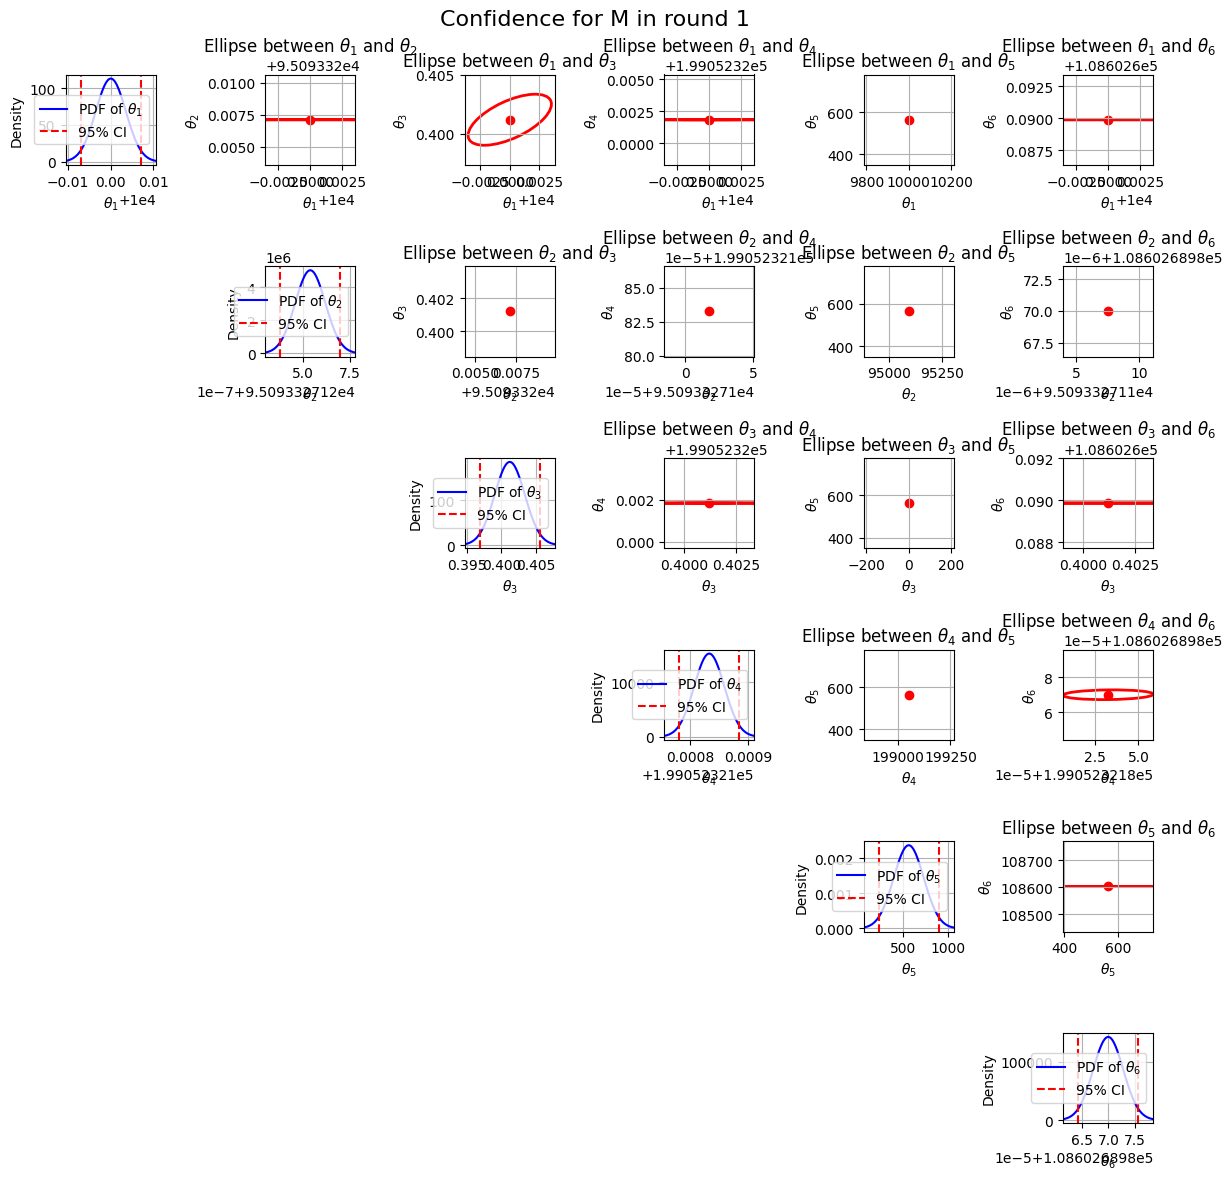

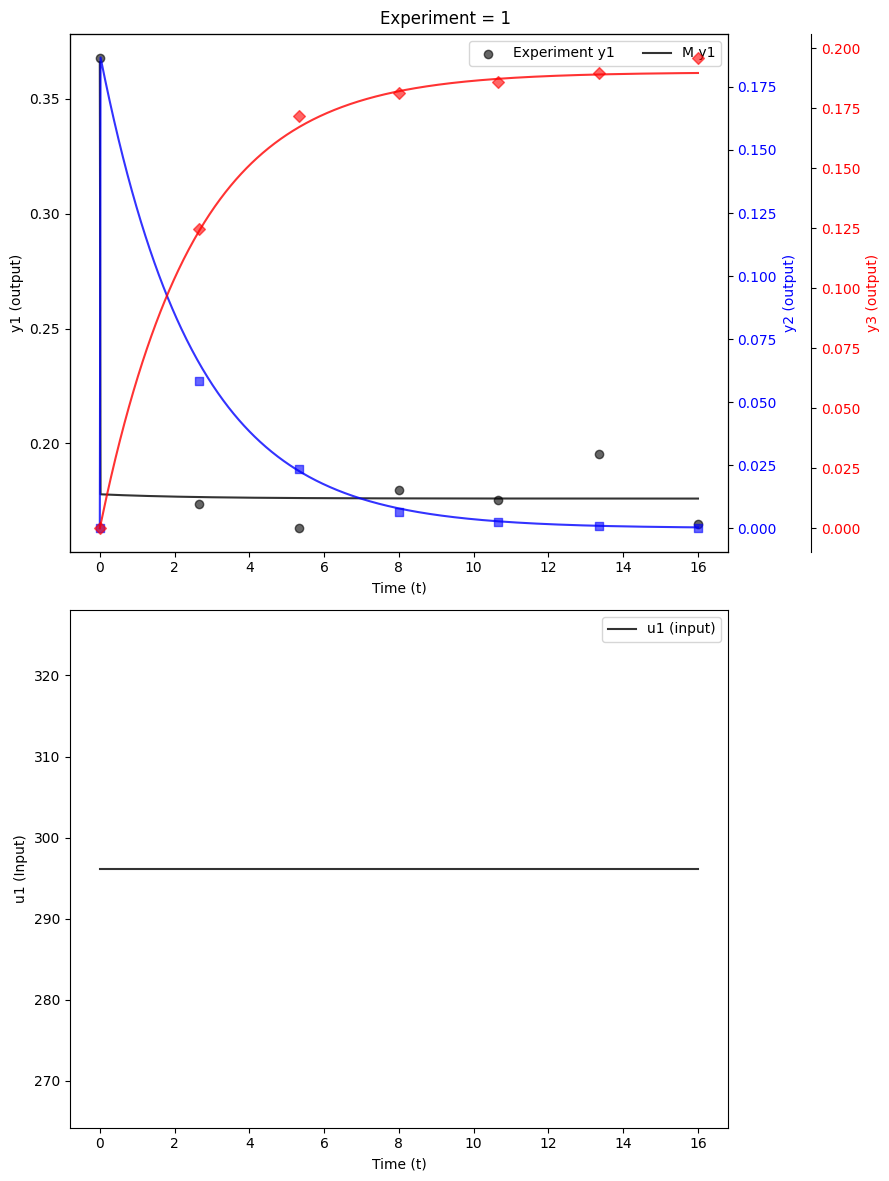

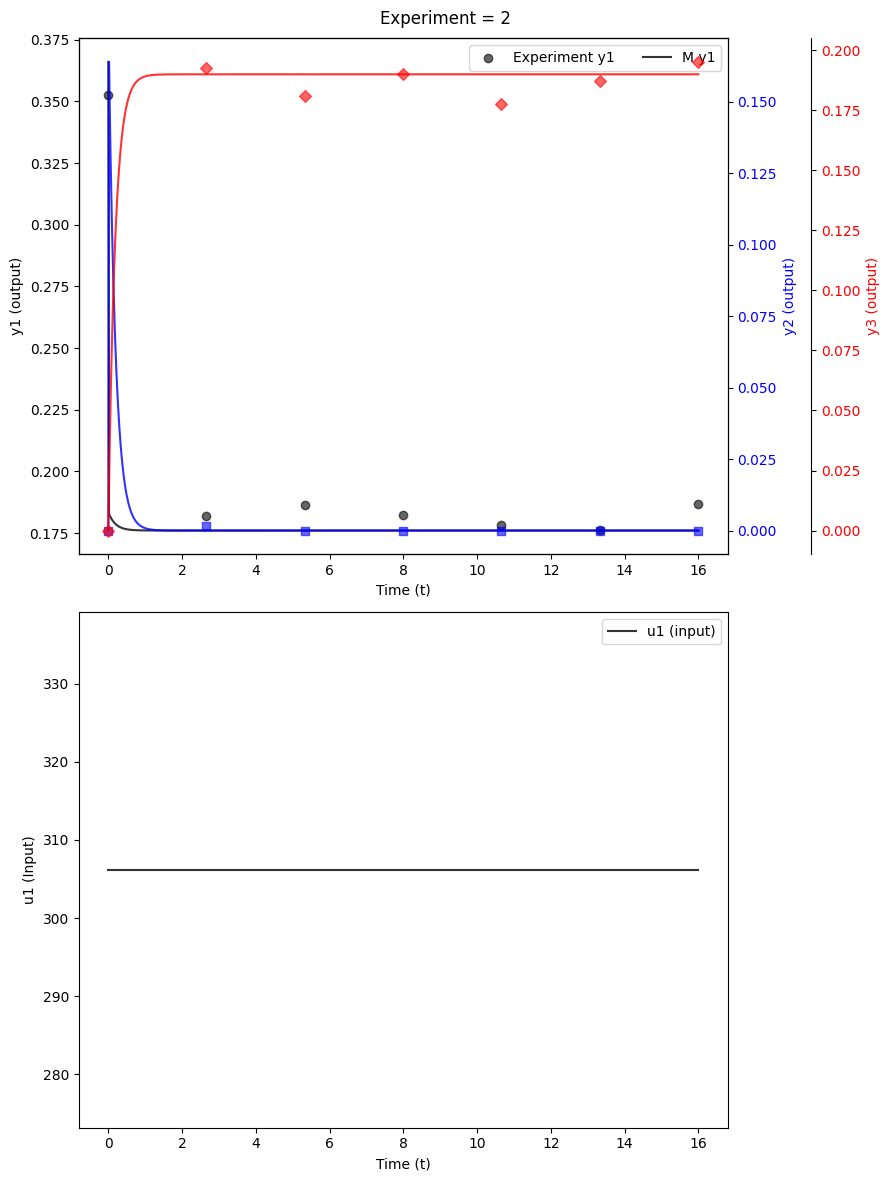

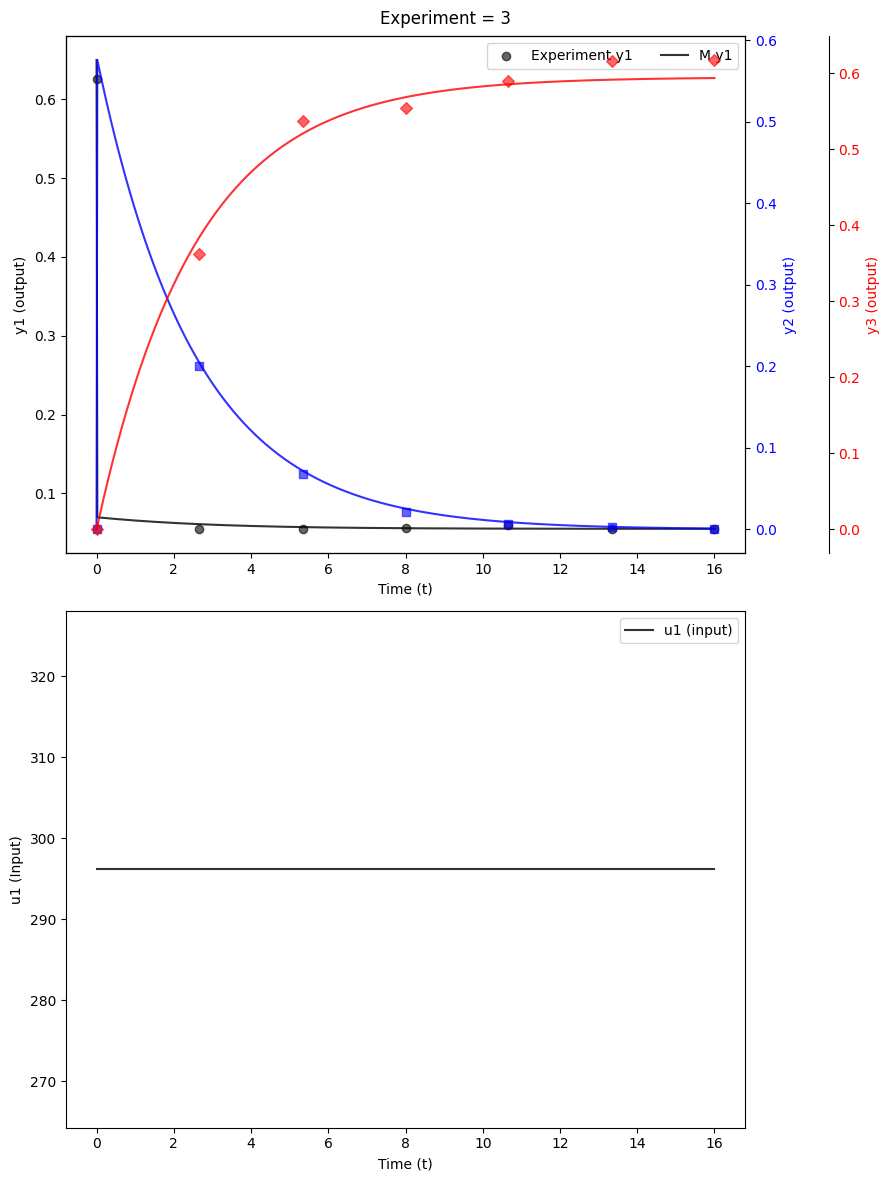

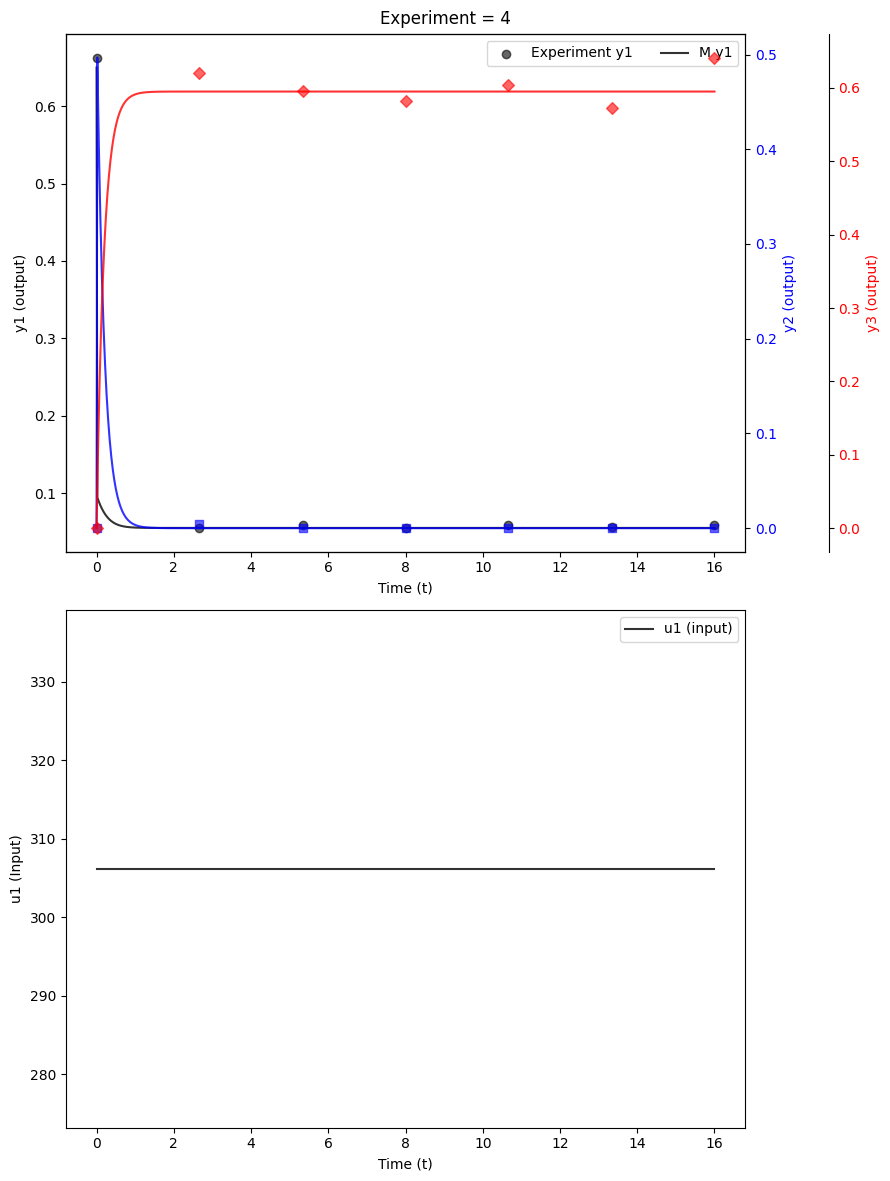

reference t value for model M and round 1: 1.9908470688116904
estimated t values for model M and round 1: [1.42339990e+06 6.00394179e+11 9.34233608e+01 3.83236637e+09
 1.68532143e+00 1.94498088e+10]
P-value for model M and round 1: 100.0
eps for model M and round 1: 0.001



{'M': np.float64(1.9908470688116904)}

In [9]:
from middoe.log_utils import  save_rounds
round_data={}
round = 1
save_rounds(round, resultun,  'preliminary', round_data, models, iden_opt, obs, data, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values,  best_uncert_result= best_uncert_result)
# save_rounds(round, resultun,  'preliminary', round_data, models, iden_opt, obs, data, system)

In [22]:
models['can_m'].remove('MIV')
models['can_m'].remove('MIII')

In [23]:
des_opt = { # Design settings for the experiment
    'eps': 1e-3, #perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    'meth': 'PS',  # optimisation method, 'G': Global Differential Evolution, 'L': Local Pattern Search, 'GL': Global Differential Evolution refined with Local Pattern Search
    'md_ob': 'HR',     # MD optimality criterion, 'HR': Hunter and Reiner, 'BFF': Buzzi-Ferraris and Forzatti
    'pp_ob': 'E',  # PP optimality criterion, 'D', 'A', 'E', 'ME'
    'plt': True,  # Plot the results
    'itr': {
        'pps': 30, # population size
        'maxmd': 200, # maximum number of MD runs
        'tolmd': 1, # tolerance for MD optimization
        'maxpp':20 ,# maximum number of PP runs
        'tolpp': 1, # tolerance for PP optimization
    }
}

In [ ]:
from middoe.des_md import mbdoe_md
designs = mbdoe_md(des_opt, system, models, round=2, num_parallel_runs=16)

In [11]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, designs, expr=3, swps=designs['swps'])


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS1\indata.xlsx
[INFO] Model used         : MI
[INFO] Design case        : MBDoE
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.08
   - y2         | measurable      | std.dev = 0.08


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/paper/CS1/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2   MES_Y:y2  MES_E:y2  X:all  y10  \
 0       19.20  1.998572  0.149764     19.20   7.395420  0.684946   0.00  1.0   
 1       20.80  1.899316  0.167887     20.80  10.875609  0.865567   0.16  1.0   
 2       25.60  2.868255  0.249398     25.60  13.294035  1.201512   0.32  1.0   
 3       33.28  5.863831  0.480166     33.28  16.254845  1.271651   0.48  1.0   
 4       36.96  7.671981  0.664324     36.96  13.596411  1.088642   0.64  1.0   
 ..        ...       ...       ...       ...        ...       ...    ...  ...   
 246       NaN       NaN       NaN       NaN        NaN       NaN  39.36  1.0   
 247       NaN       NaN       NaN       NaN        NaN       NaN  39.52  1.0   
 248       NaN       NaN       NaN       NaN        NaN       NaN  39.68  1.0   
 249       NaN       NaN       NaN       NaN        NaN       NaN  39.84  1.0   
 250       NaN       NaN 

In [12]:
data = read_excel('indata')
resultpr = parmest(system, models, iden_opt, data)
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
obs = uncert_results['obs']

[INFO] Reading from indata.xlsx
Objective function: 'WLS'| model 'MI' | CPU time 0.1307 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1318 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1139 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1122 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1159 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1330 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1263 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1286 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1346 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1401 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1355 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1253 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1220 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1326 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1231 se

C:\Users\Tadmin\PycharmProjects\middoe\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Objective function: 'WLS'| model 'MI' | CPU time 0.1296 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1186 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1177 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1204 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1209 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1457 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1157 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1107 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1181 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1132 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1103 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1109 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1131 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1190 seconds.
Objective function: 'WLS'| model 'MI' | CPU time 0.1110 seconds.
Objective function: 'WLS'

C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_utils.py:531: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(vals)


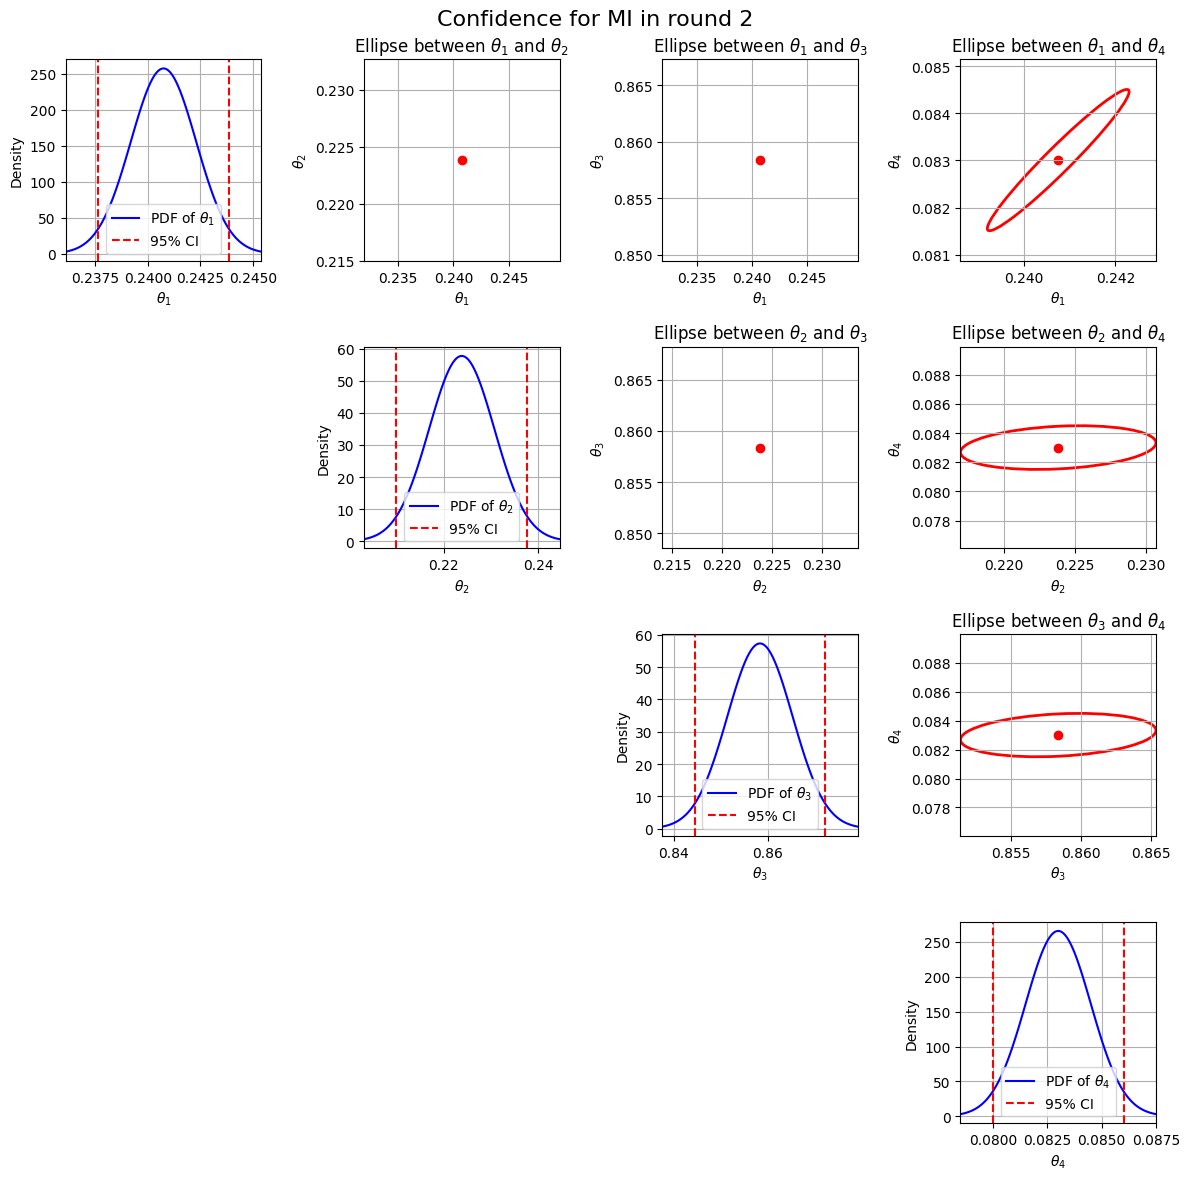

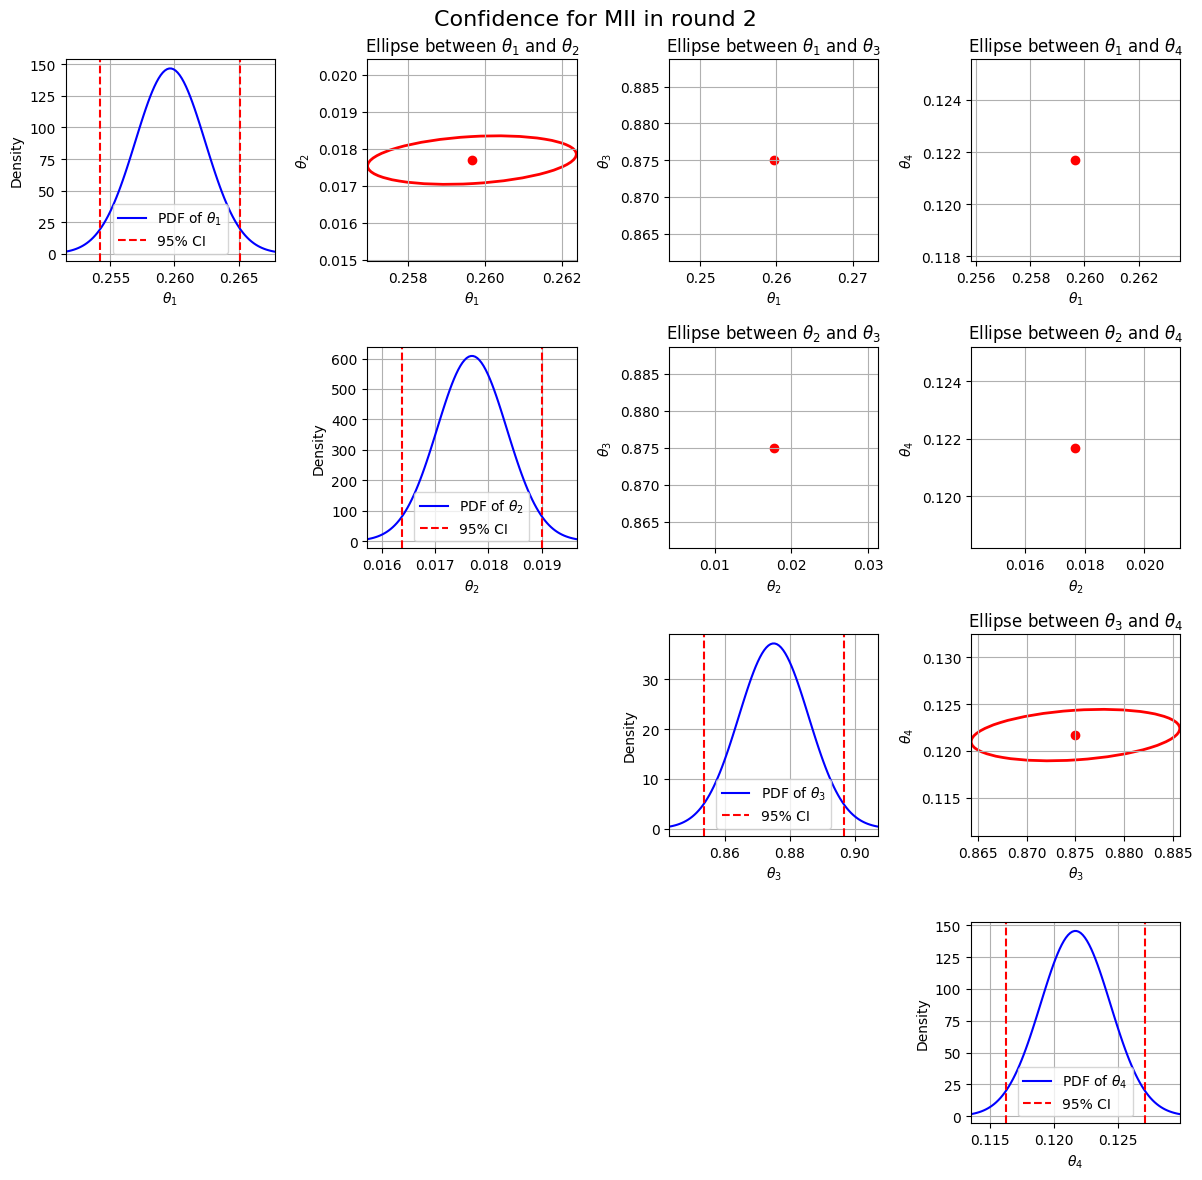

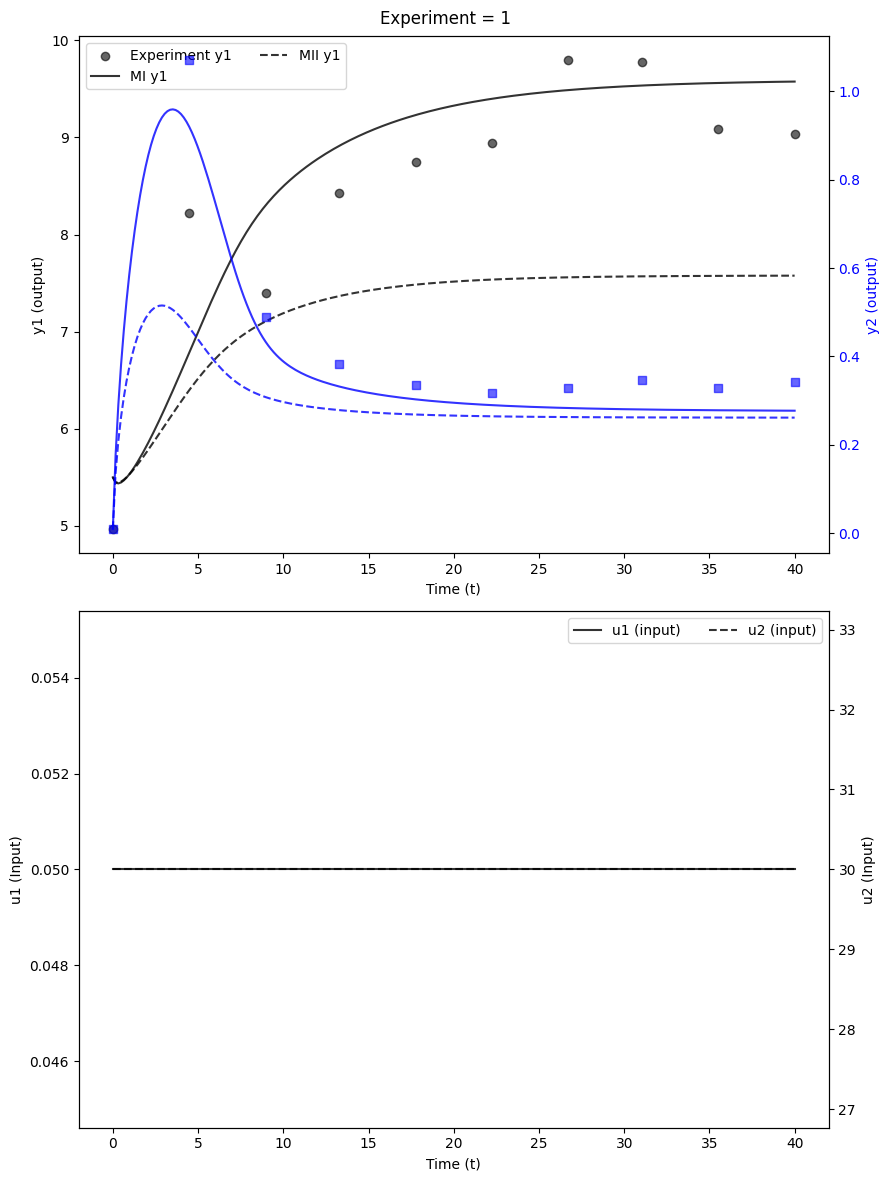

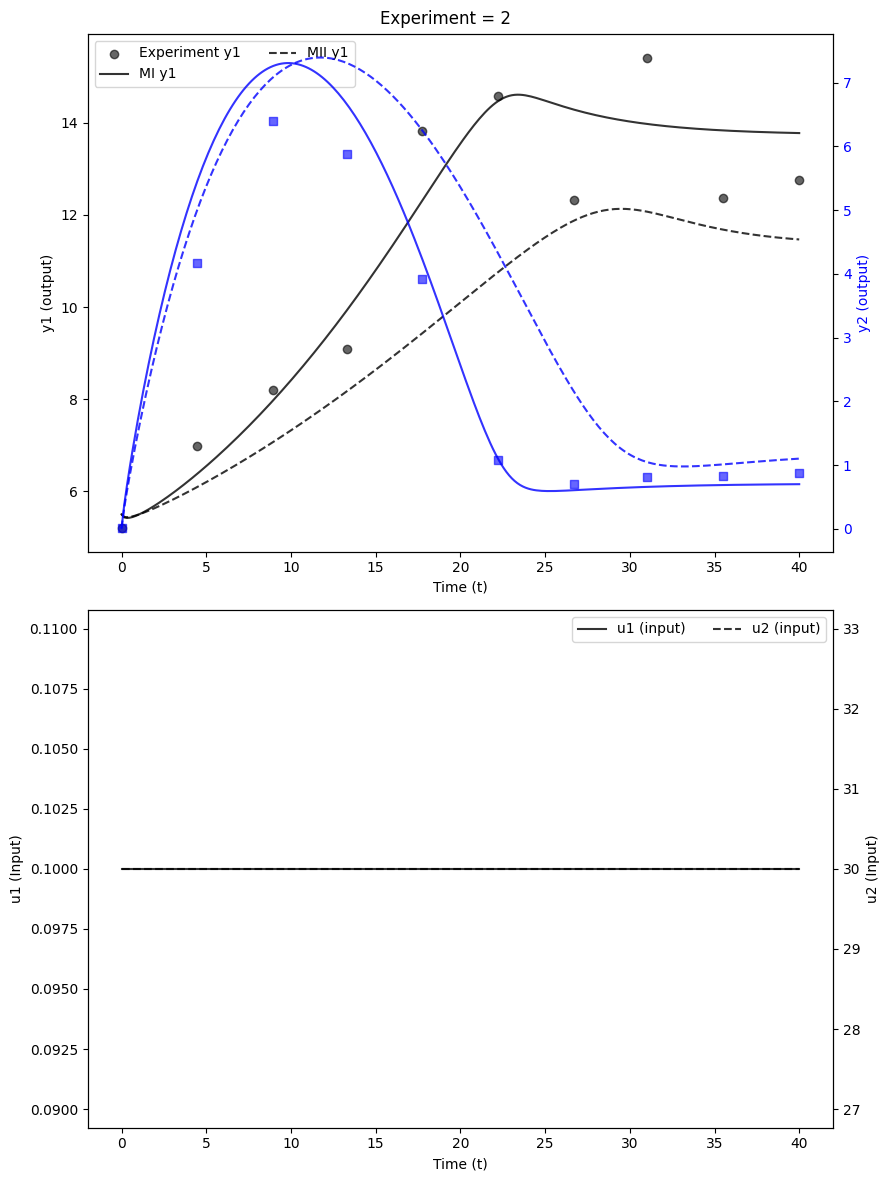

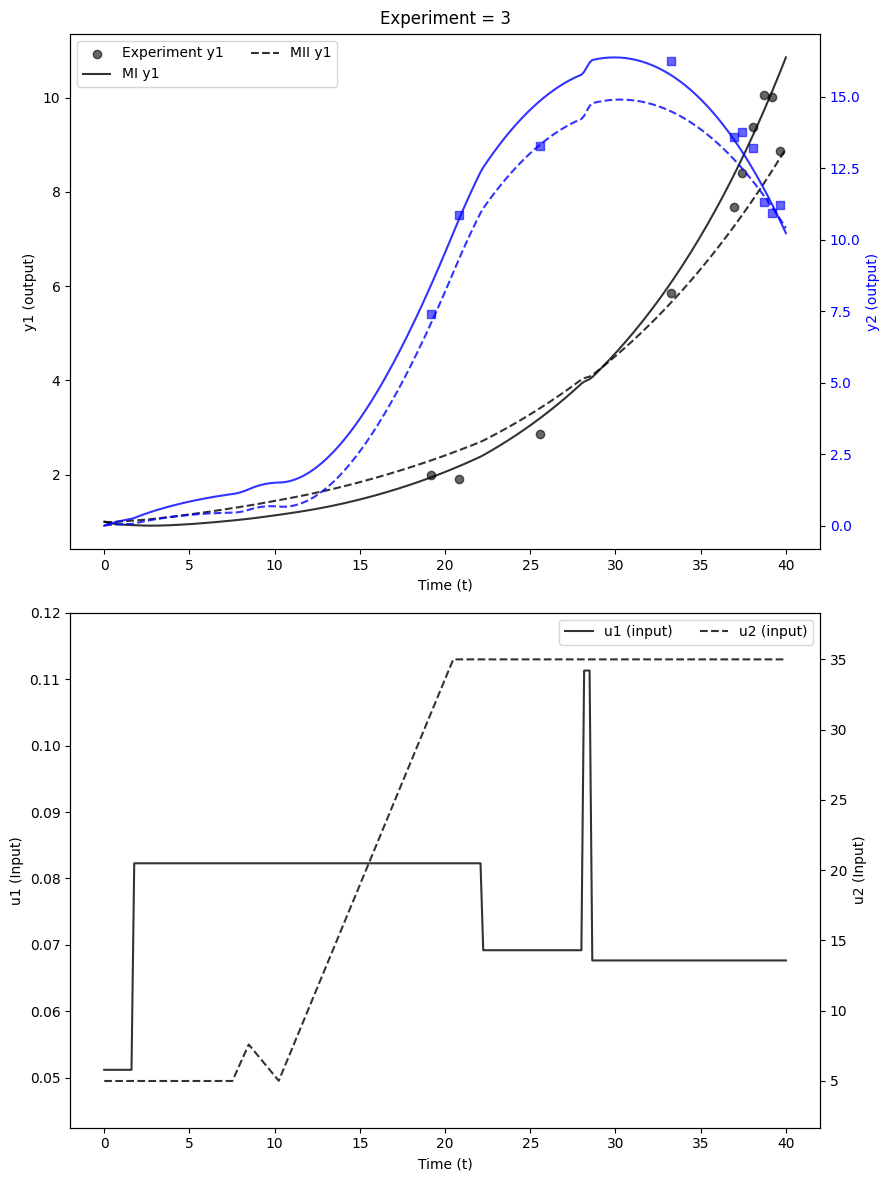

reference t value for model MI and round 2: 2.003240718847872
estimated t values for model MI and round 2: [77.52164207 16.17478357 61.54870629 27.61653402]
P-value for model MI and round 2: 99.83122471865096
eps for model MI and round 2: 0.001
reference t value for model MII and round 2: 2.003240718847872
estimated t values for model MII and round 2: [47.67897506 13.47218416 40.75341726 22.16996735]
P-value for model MII and round 2: 0.16877528134904818
eps for model MII and round 2: 0.001



In [13]:
round = 2
trv=save_rounds(round, resultun,  'MBDOE_MD', round_data, models, iden_opt, obs, data, system)



In [14]:
from middoe.log_utils import save_to_jac
save_to_jac(round_data, purpose="iden")

[INFO] Results saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS1\iden_results.jac


INFO:middoe.iden_utils:Starting pcomp_plot.


Loaded: iden_results.jac
File not found: sensa_results.jac


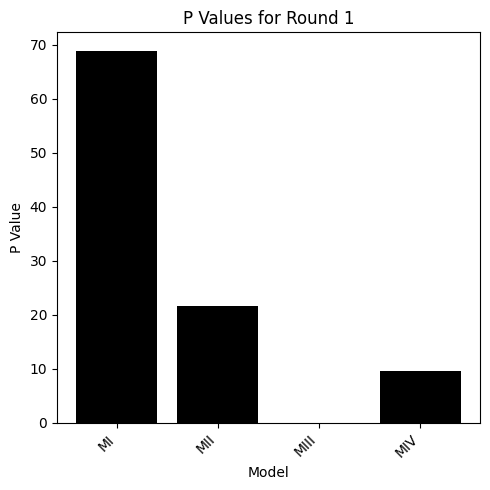

INFO:middoe.iden_utils:P values plot for Round 1 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS1\post_processing\p_values_round_1.png.


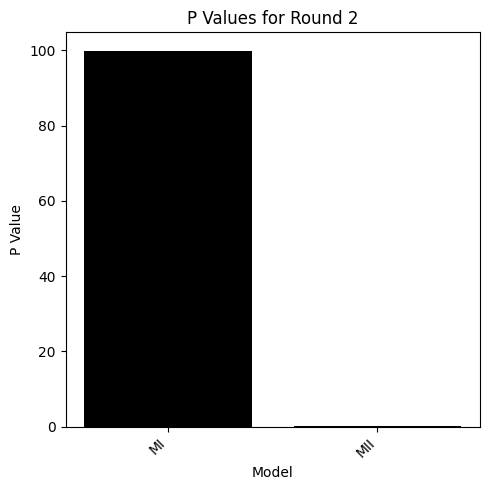

INFO:middoe.iden_utils:P values plot for Round 2 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS1\post_processing\p_values_round_2.png.
INFO:middoe.iden_utils:Starting tcomp_plot.


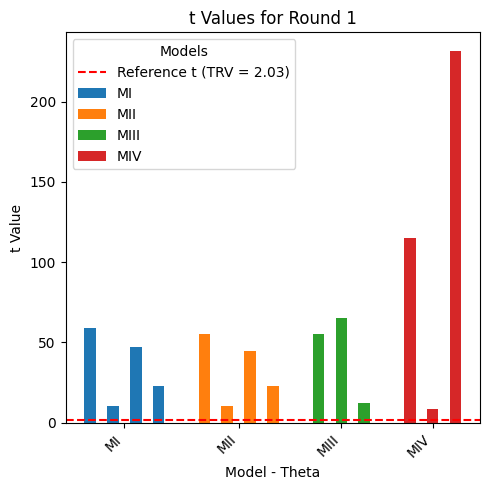

INFO:middoe.iden_utils:T values plot for Round 1 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS1\post_processing\t_values_round_1.png.


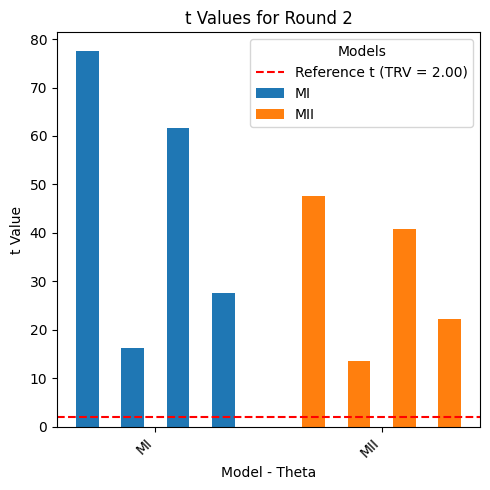

INFO:middoe.iden_utils:T values plot for Round 2 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS1\post_processing\t_values_round_2.png.


Post-processing model: MI


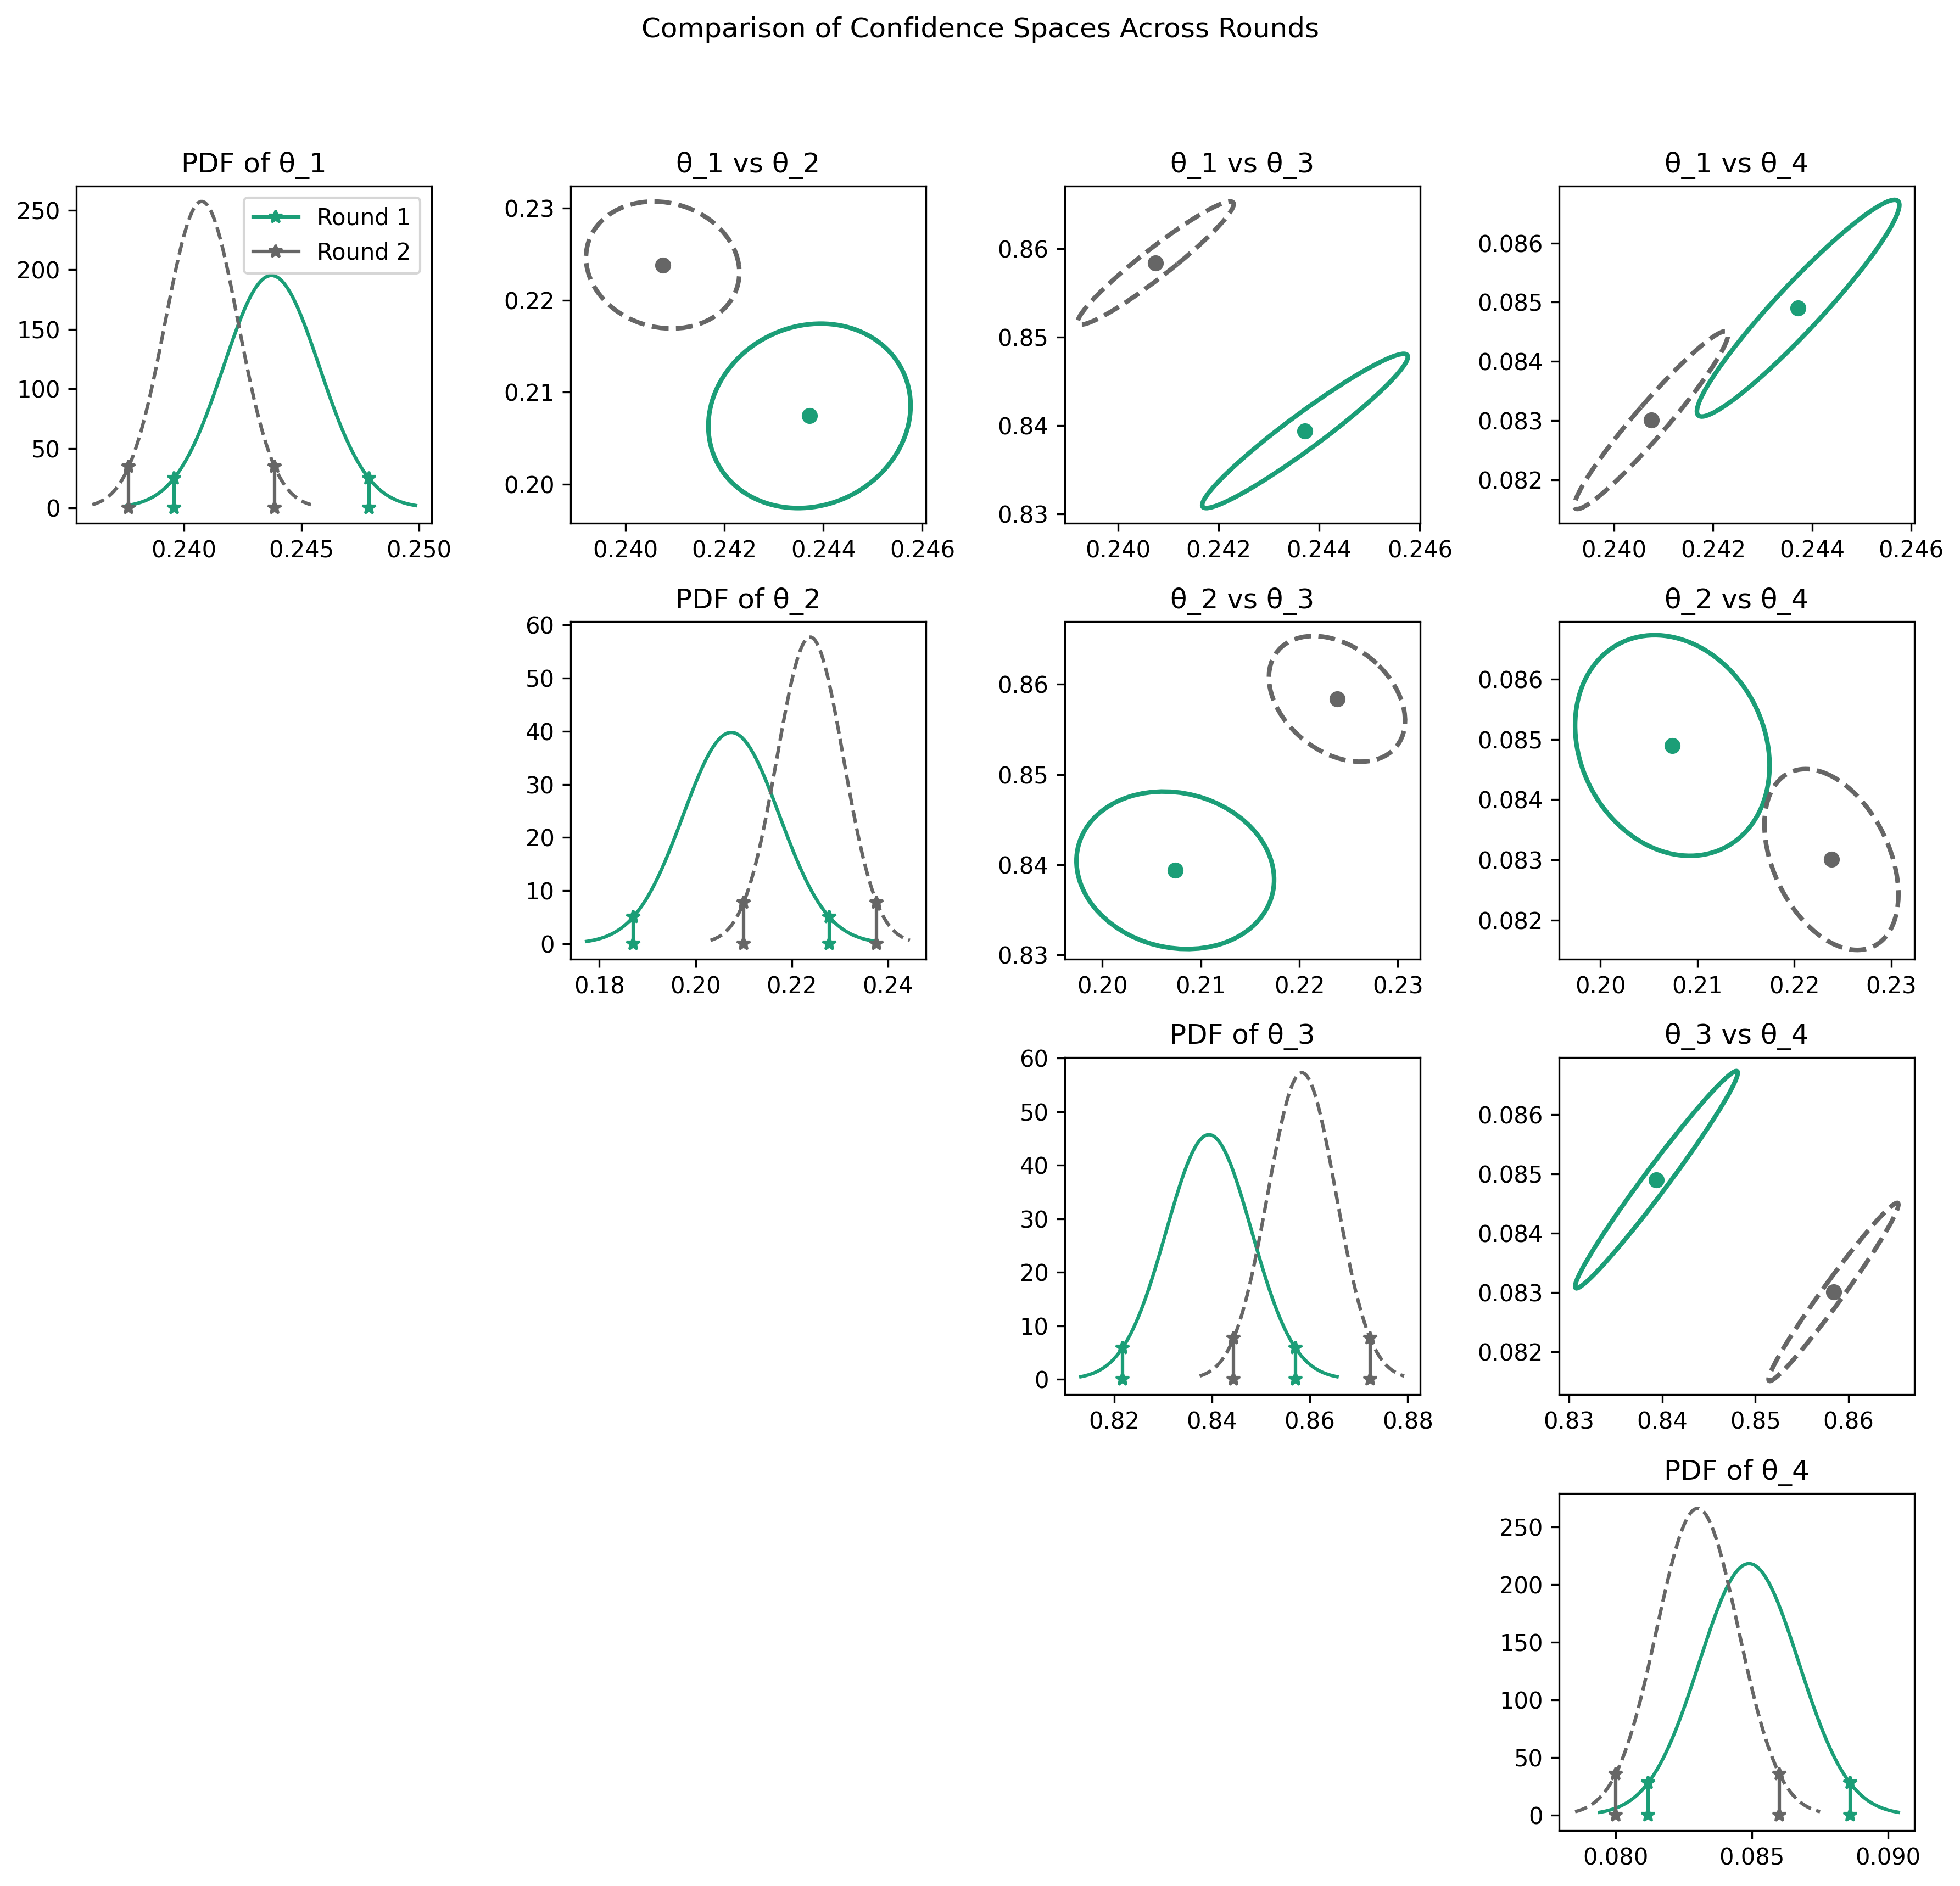

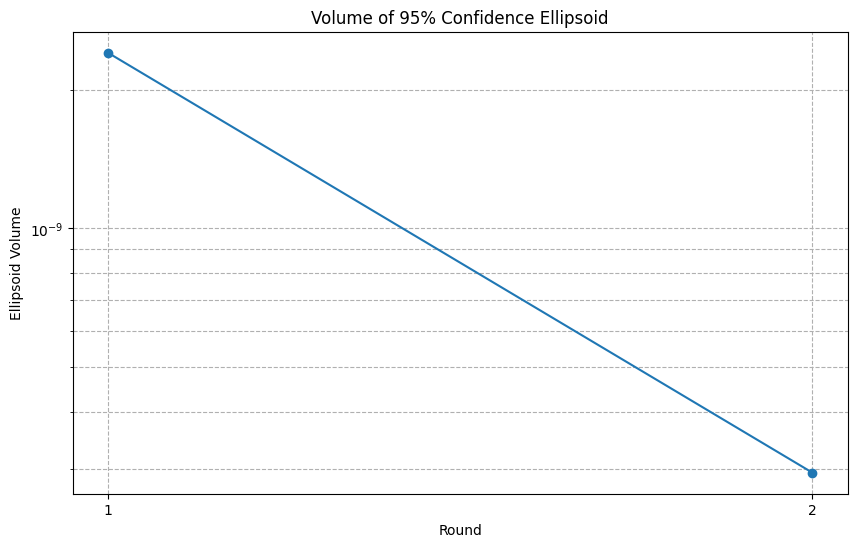

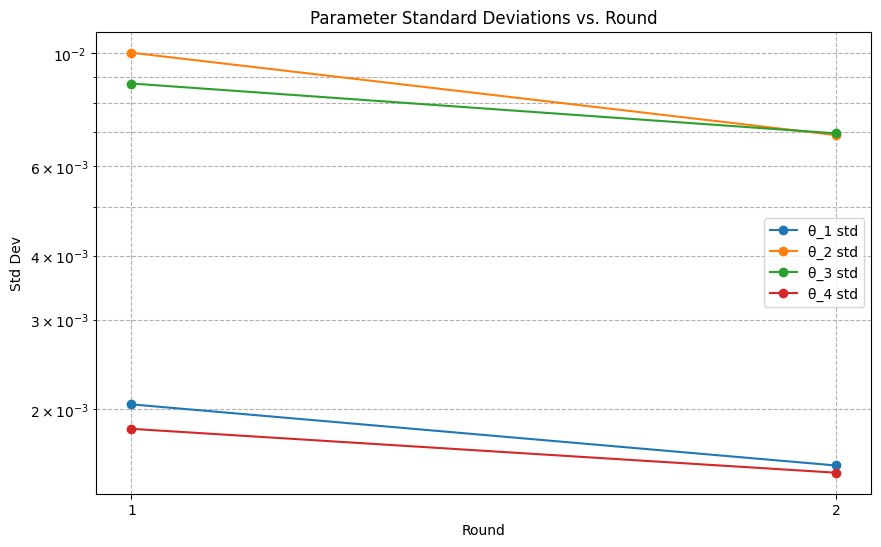

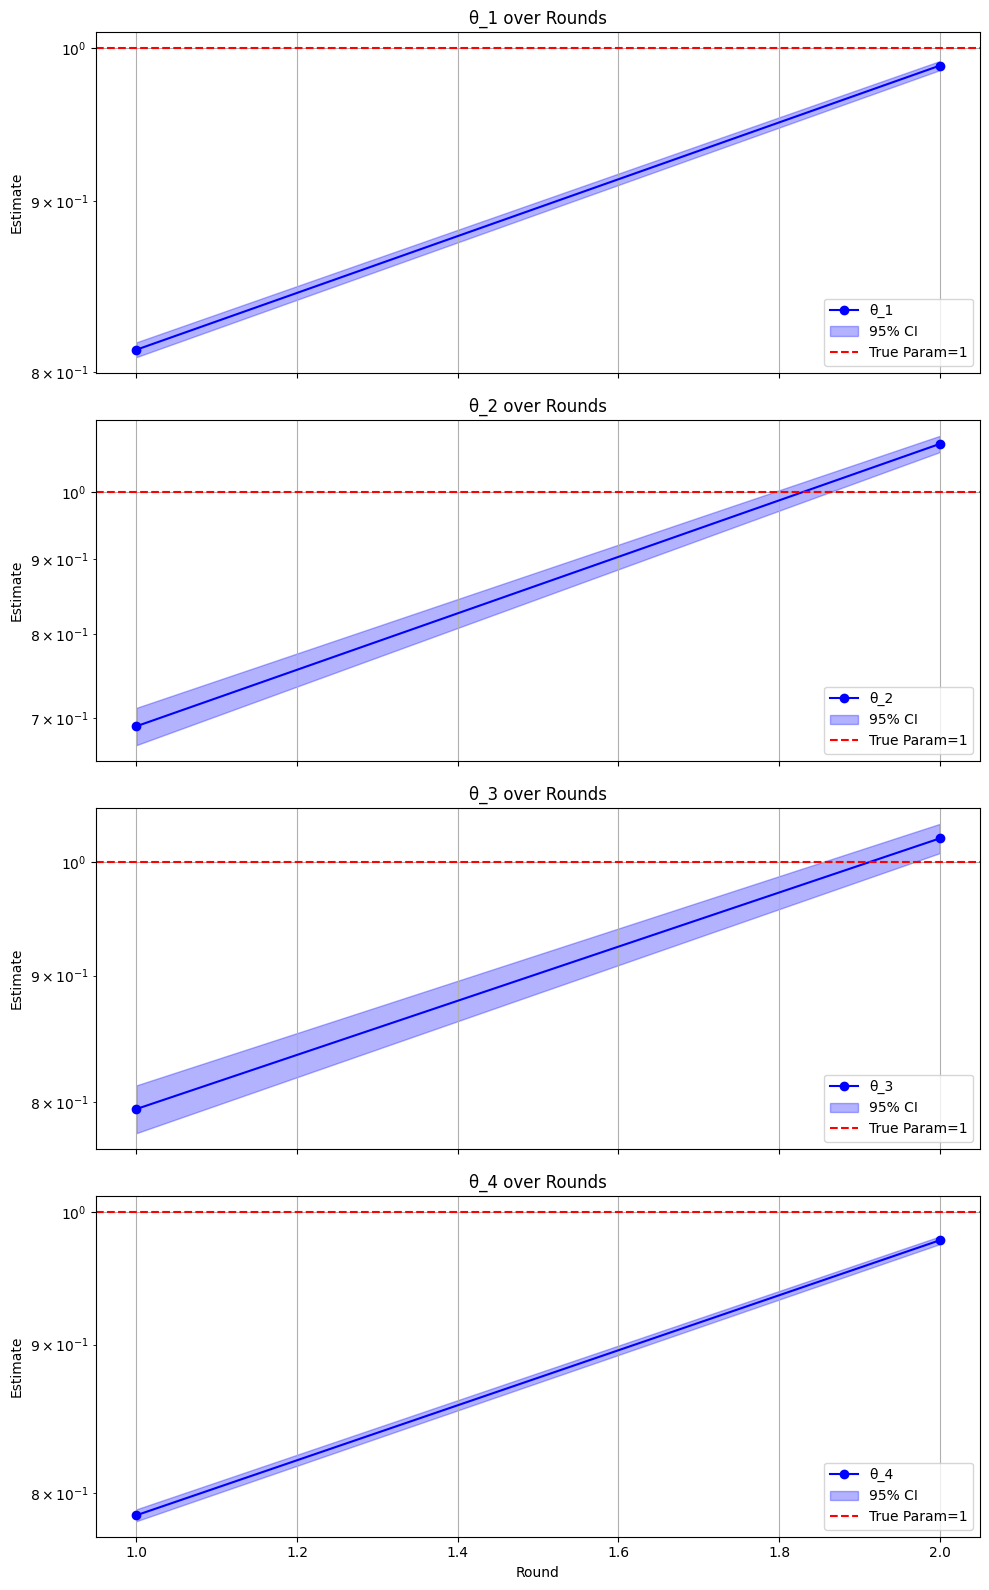

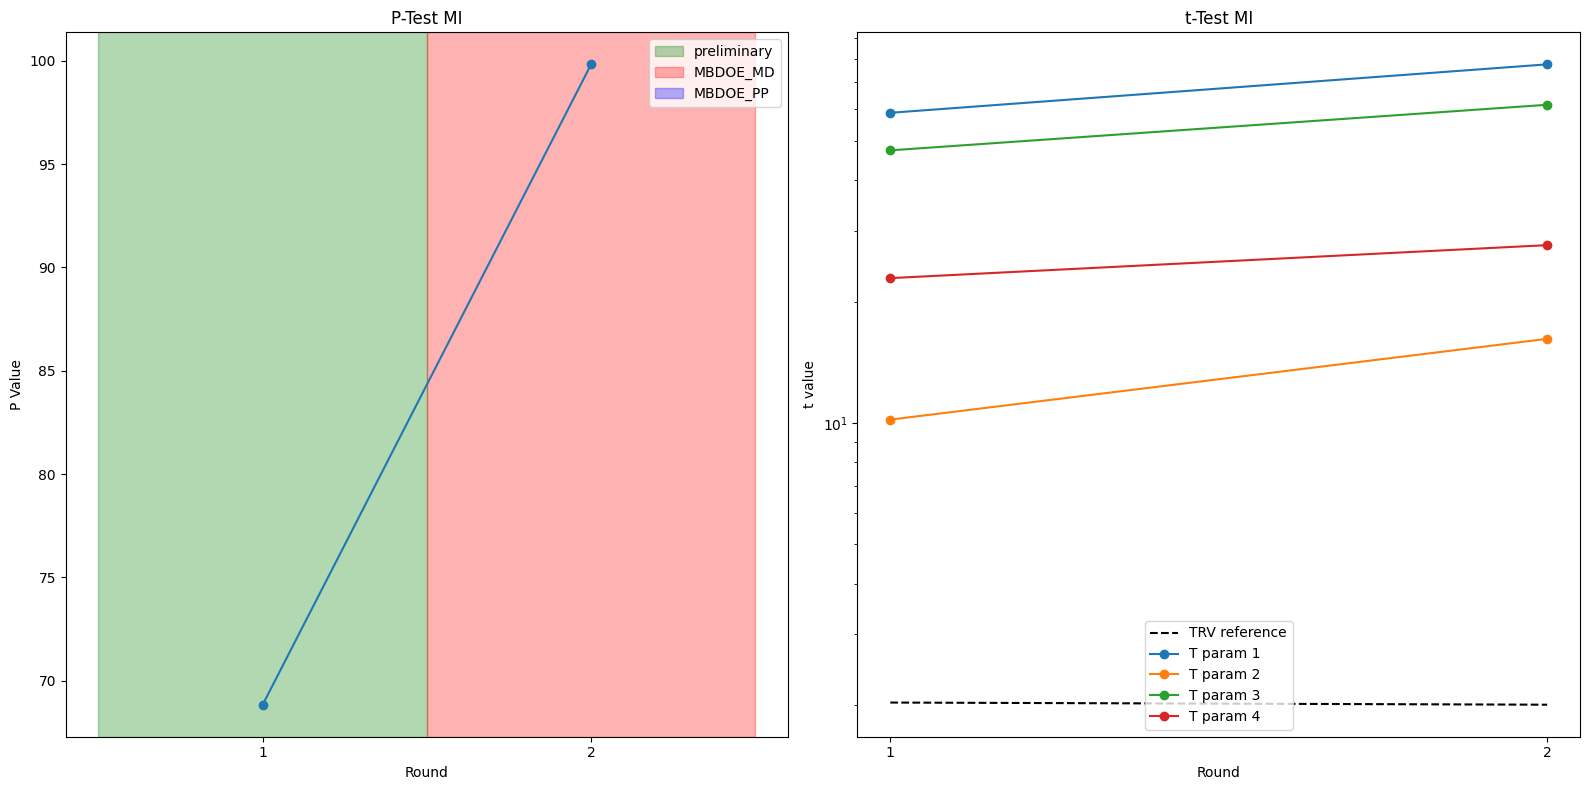

INFO:middoe.iden_utils:Reporter wrote data for Round 1 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS1\post_processing\MI_report_1.xlsx'.
INFO:middoe.iden_utils:Reporter wrote data for Round 2 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS1\post_processing\MI_report_2.xlsx'.
INFO:middoe.iden_utils:Summary written to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS1\post_processing\MI_report_summary.txt'.


No rCC_values found for any round. Plotting is skipped.
Post-processing model: MII


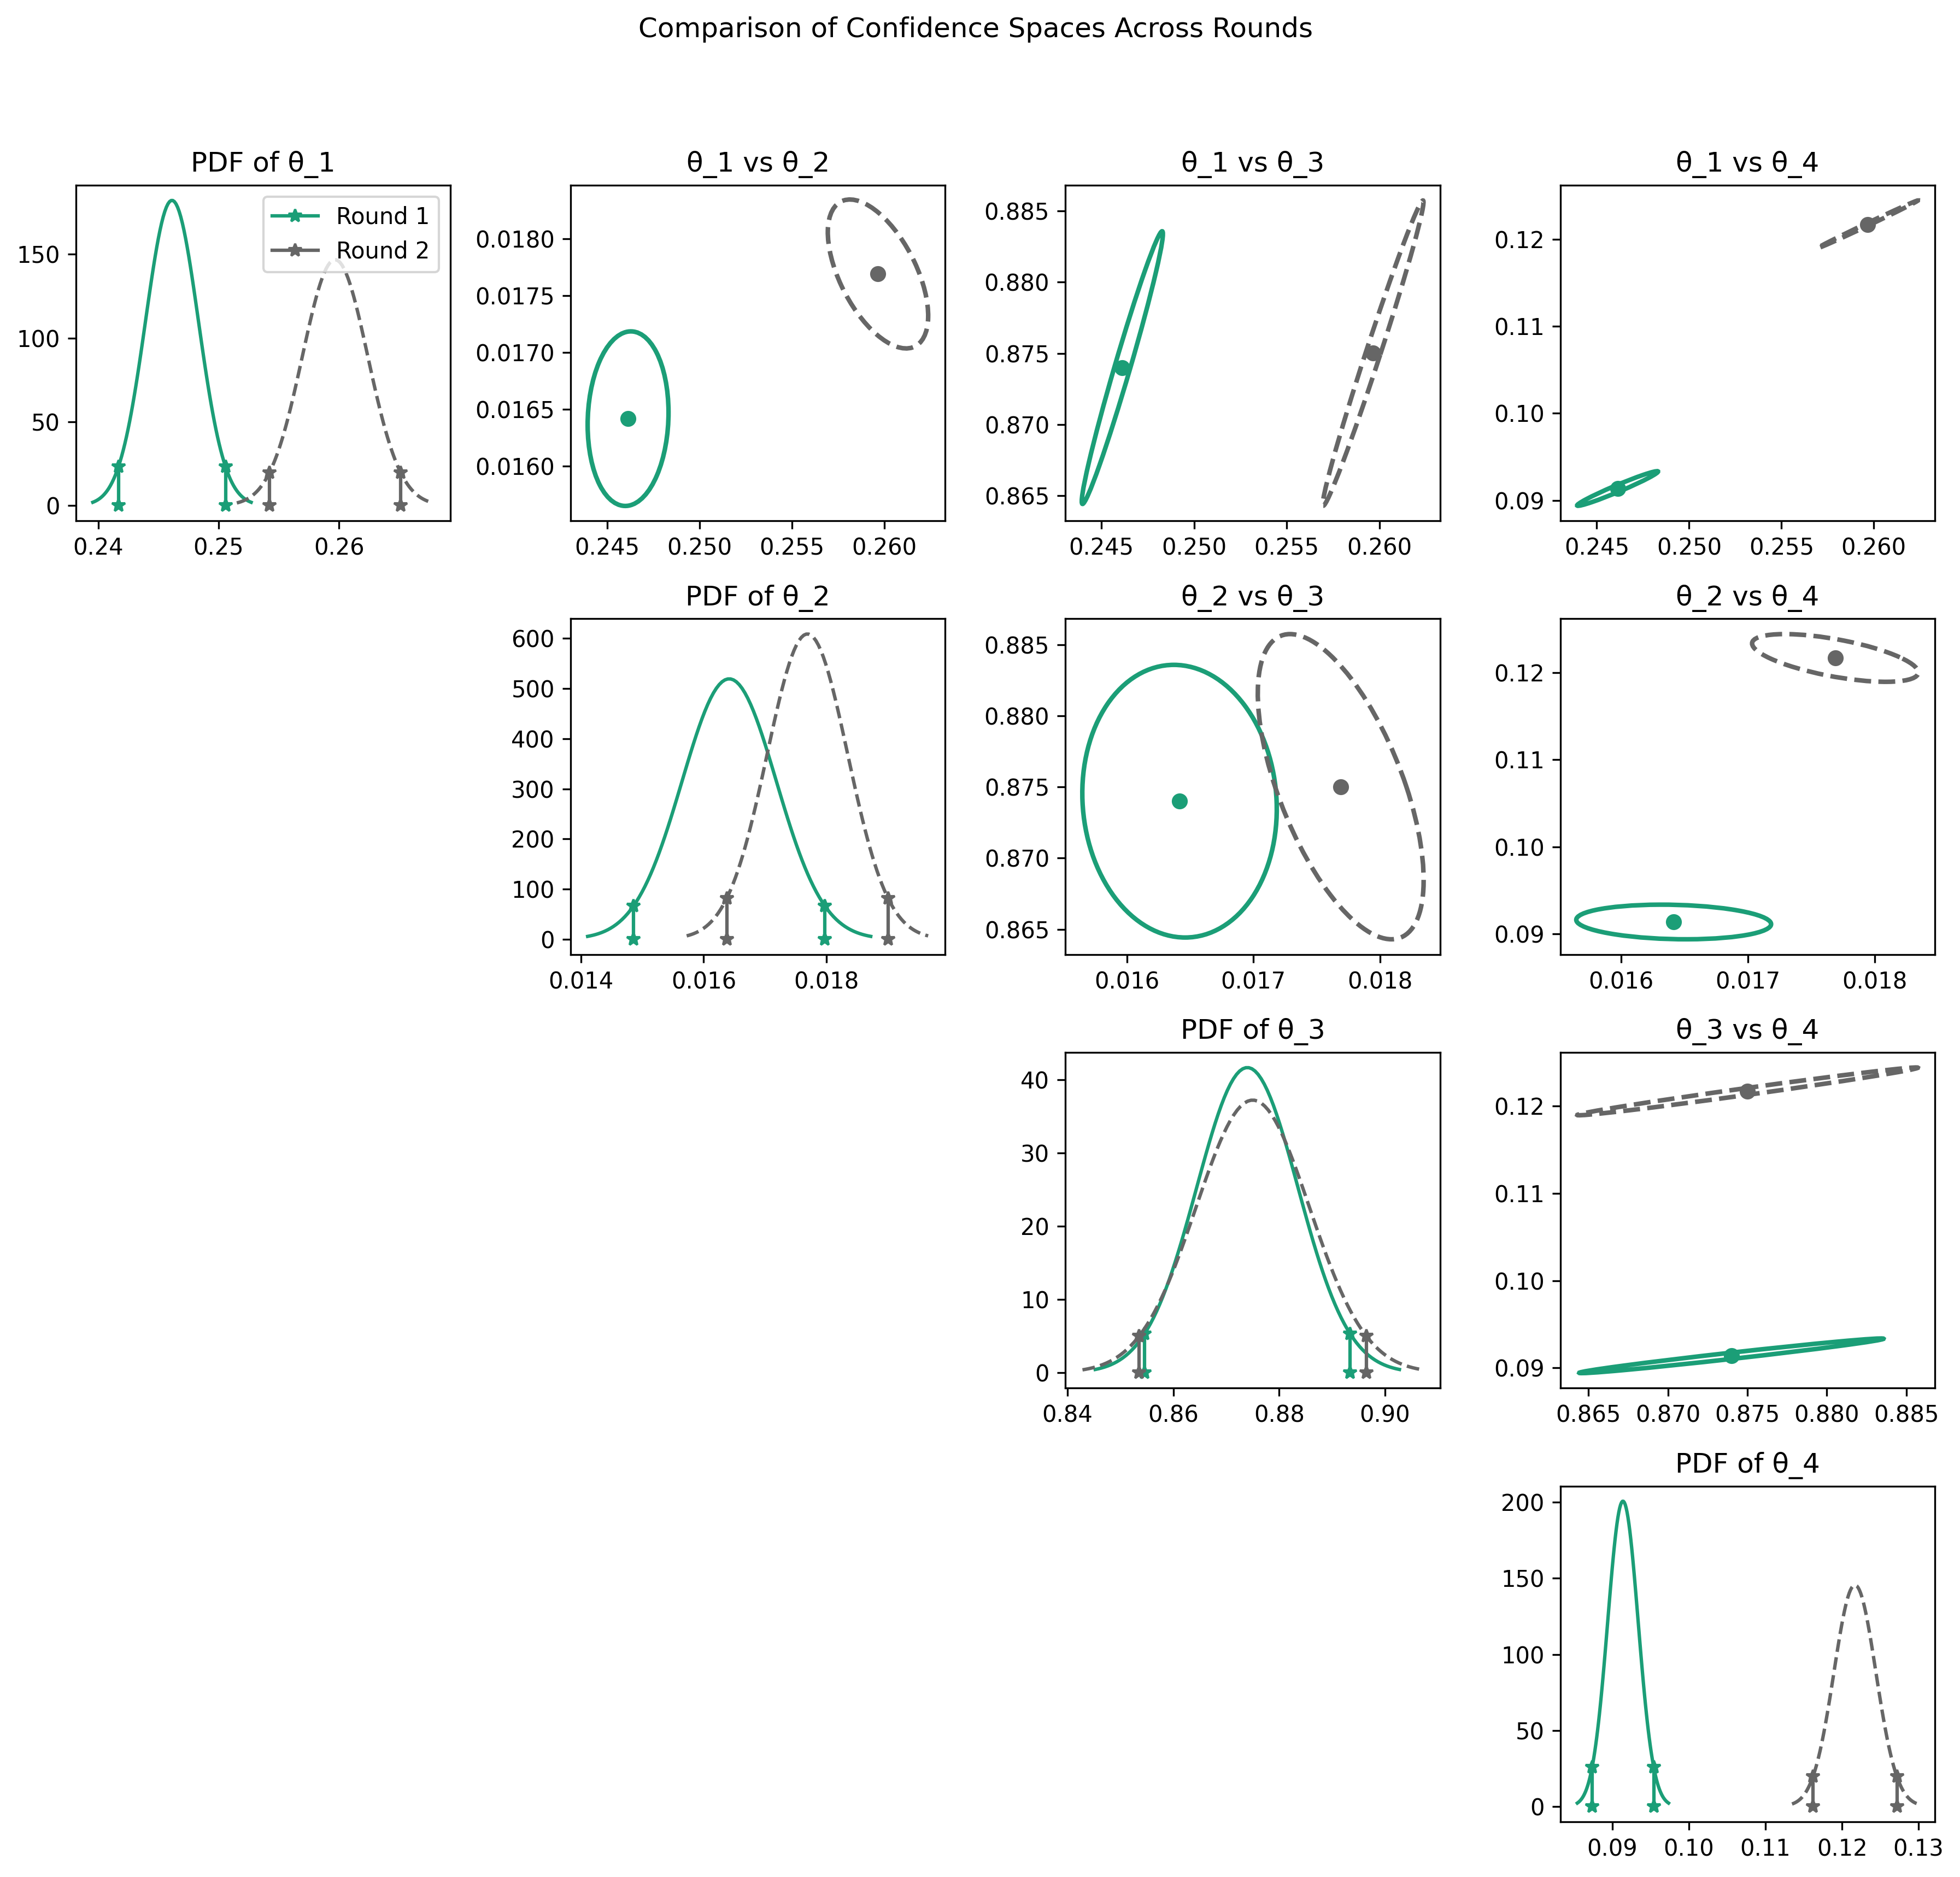

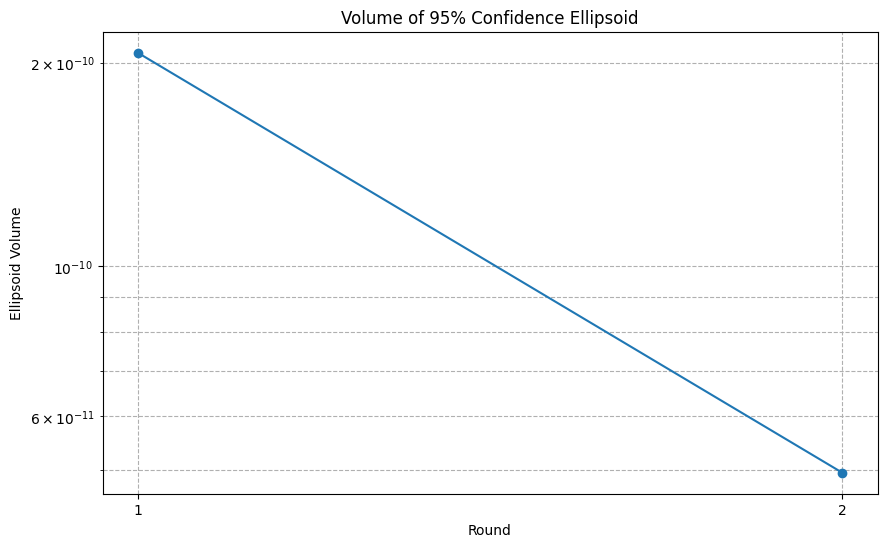

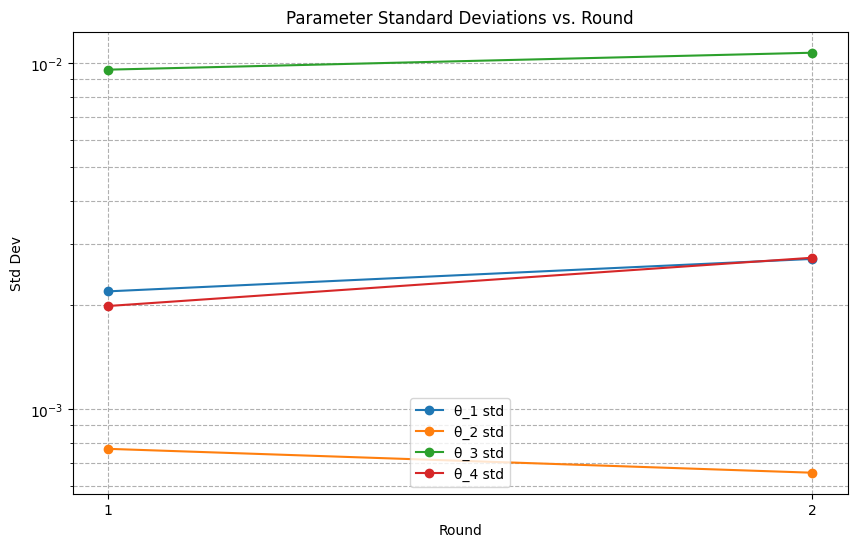

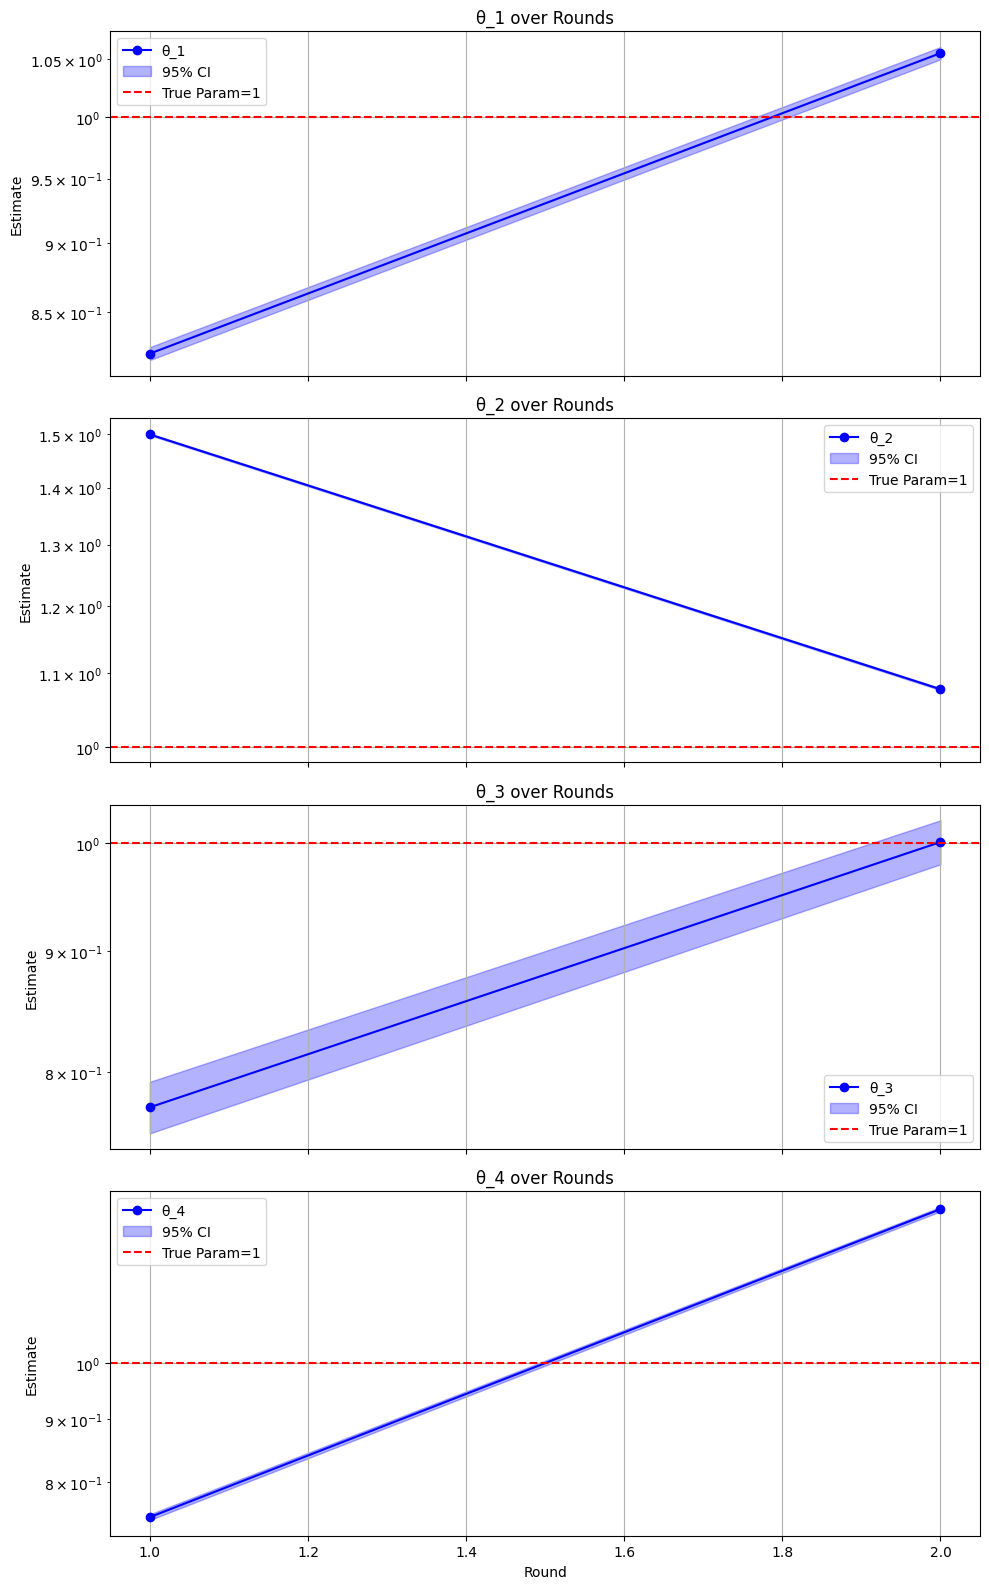

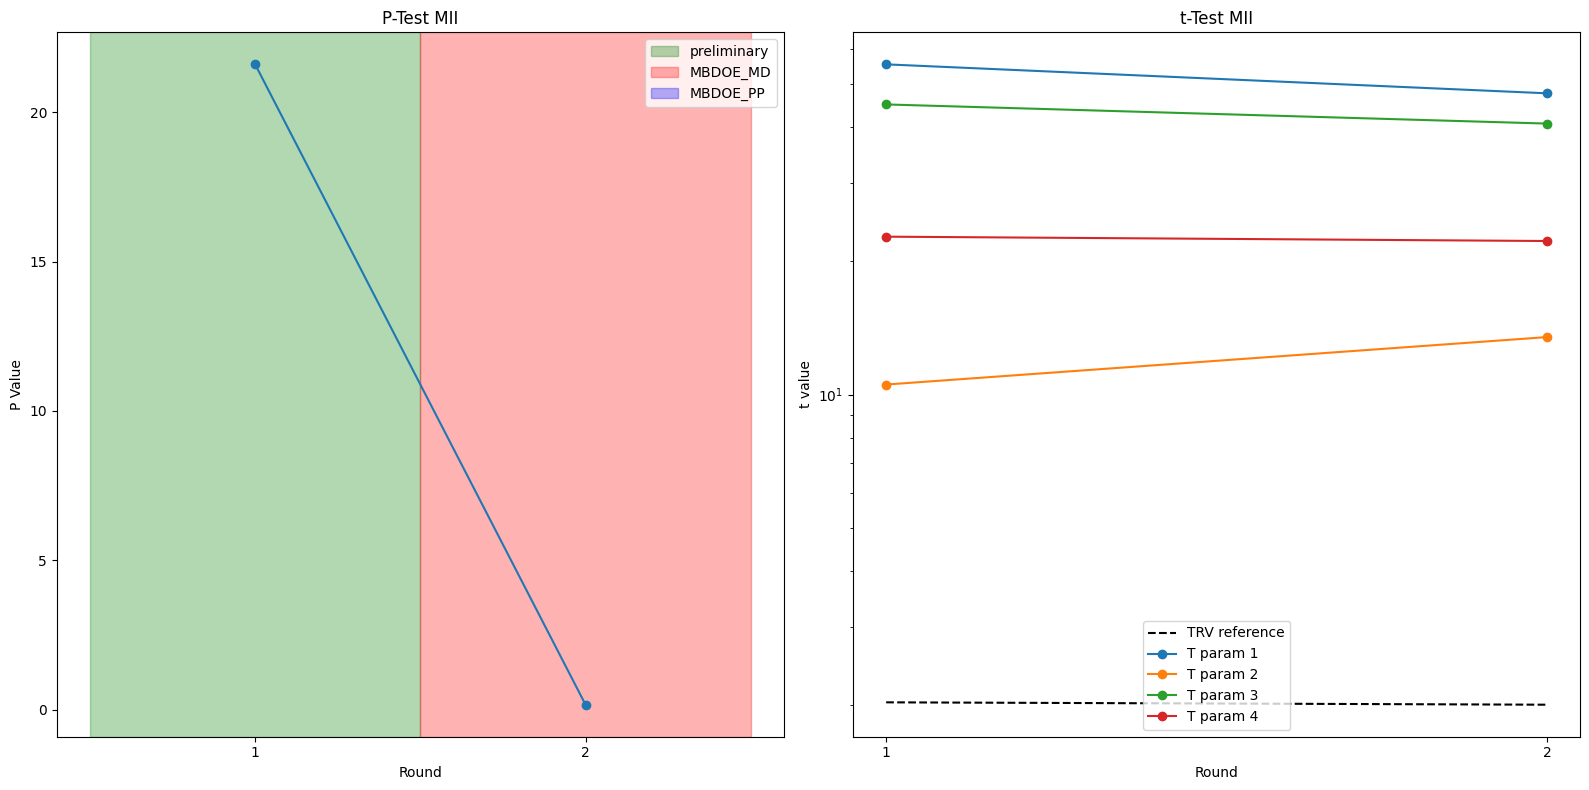

INFO:middoe.iden_utils:Reporter wrote data for Round 1 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS1\post_processing\MII_report_1.xlsx'.
INFO:middoe.iden_utils:Reporter wrote data for Round 2 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS1\post_processing\MII_report_2.xlsx'.
INFO:middoe.iden_utils:Summary written to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\paper\CS1\post_processing\MII_report_summary.txt'.


No rCC_values found for any round. Plotting is skipped.
Post-processing completed for: MI, MII


In [15]:
from middoe.log_utils import load_from_jac
results = load_from_jac()
iden = results['iden']

from middoe.iden_utils import run_postprocessing
run_postprocessing(
    round_data=results['iden'],
    solvers=['MI', 'MII'],
    selected_rounds=[ 1, 2],
    plot_global_p_and_t=True,
    plot_confidence_spaces=True,
    plot_p_and_t_tests=True,
    export_excel_reports=True,
    plot_estimability=True
)